In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('50_Startups.csv')
data.columns=['R_and_D_Spend','Administration','Marketing_Spend','State','Profit']

In [3]:
data.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_and_D_Spend    50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R_and_D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [7]:
for i in data:
    if(data[i].dtype=='float64'):
        data[i]=scalar.fit_transform(data[[i]].values)

In [8]:
data.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,2.153943,New York,2.011203
1,1.955860,1.082807,1.923600,California,1.999430
2,1.754364,-0.728257,1.626528,Florida,1.980842
3,1.554784,-0.096365,1.422210,New York,1.776627
4,1.504937,-1.079919,1.281528,Florida,1.357740


In [9]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
state_map={'New York':0,'California':1,'Florida':2}

In [11]:
data['State']=data['State'].map(state_map)

In [12]:
data.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,2.153943,0,2.011203
1,1.955860,1.082807,1.923600,1,1.999430
2,1.754364,-0.728257,1.626528,2,1.980842
3,1.554784,-0.096365,1.422210,0,1.776627
4,1.504937,-1.079919,1.281528,2,1.357740


<AxesSubplot:>

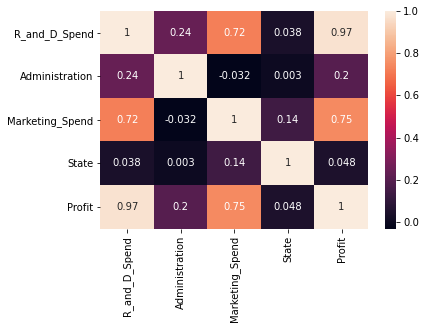

In [13]:
sns.heatmap(data.corr(),xticklabels=data.columns,yticklabels=data.columns,annot=True)

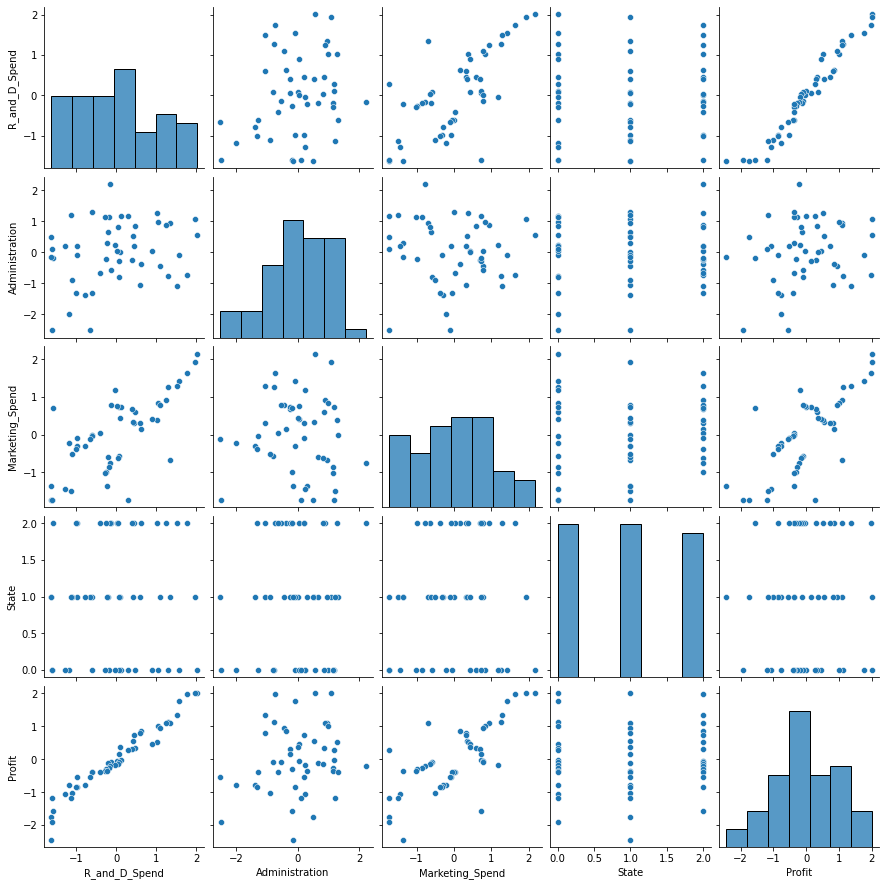

In [14]:
sns.pairplot(data)

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

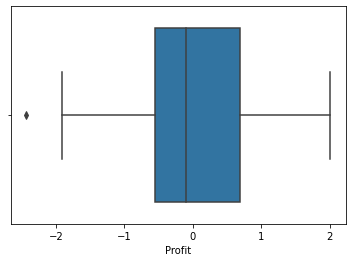

In [15]:
sns.boxplot(data['Profit'])
#detected one outlier point

In [16]:
data[data['Profit']<-2].index
data=data.drop(index=[49],axis=0)

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

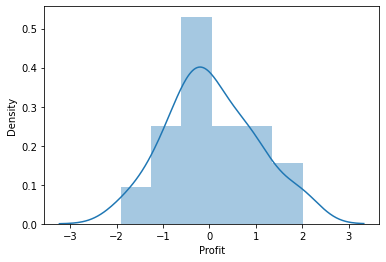

In [17]:
sns.distplot(data['Profit'])

In [18]:
import statsmodels.formula.api as sm

In [19]:
model=sm.ols('Profit~R_and_D_Spend+Administration+Marketing_Spend',data=data).fit()

In [20]:
model.params

Intercept          0.018167
R_and_D_Spend      0.891713
Administration    -0.015433
Marketing_Spend    0.076560
dtype: float64

In [21]:
print(model.tvalues,'/n',model.pvalues)
#here Administration and Marketing_Spent pvalue is greater than 0.05 so it's not significant variable
#But if I remove those two varible then it would become simple linear regression model.

Intercept           0.654017
R_and_D_Spend      20.469501
Administration     -0.517889
Marketing_Spend     1.825383
dtype: float64 /n Intercept          5.164296e-01
R_and_D_Spend      1.971077e-24
Administration     6.070728e-01
Marketing_Spend    7.458443e-02
dtype: float64


In [22]:
rsq_r_and_d = sm.ols('R_and_D_Spend~Administration+Marketing_Spend',data=data).fit().rsquared  
vif_r_and_d = 1/(1-rsq_r_and_d) 

rsq_admin = sm.ols('Administration~R_and_D_Spend+Marketing_Spend',data=data).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

rsq_marketing = sm.ols('Marketing_Spend~Administration+R_and_D_Spend',data=data).fit().rsquared  
vif_marketing = 1/(1-rsq_marketing) 

# Storing vif values in a data frame
d1 = {'Variables':['R_and_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_r_and_d,vif_admin,vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
#NO multi colinearlity detected 

,Variables,VIF
0,R_and_D_Spend,2.377754
1,Administration,1.175172
2,Marketing_Spend,2.239957


In [23]:
import statsmodels.api as s

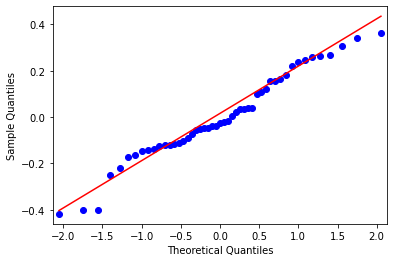

In [24]:
qqplot=s.qqplot(model.resid,line='q')

In [38]:
list(np.where((model.resid<-0.2)))

[array([14, 15, 27, 46, 48], dtype=int64)]

In [27]:
data=data.drop(index=[27, 46, 48],axis=0)

In [29]:
new_data=pd.DataFrame({'R_and_D_Spend':[16000,10000,7000],'Administration':[13000,12000,1000],'Marketing_Spend':[12000,13000,4000]})

In [30]:
new_data

,R_and_D_Spend,Administration,Marketing_Spend
0,16000,13000,12000
1,10000,12000,13000
2,7000,1000,4000


In [31]:
model.predict(new_data)

0    14985.520057
1     9727.233284
2     6532.816474
dtype: float64

In [32]:
model.rsquared
# though model have insignificant features included then also model is excellent

0.9613162435129847